<h1><b><center> Implementing neural network from scratch using numpy</center></b><h1>
    
   
<h4>  
<b> Submitted by: </b>
Palakodeti Nagendra Deepak

Email ID: pndeepak1998@gmail.com

Contact info: +91-8408923489

<h4>

# Introduction

**What is a neural network?**

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

A neural network generally consists of 3 layers: 
- Single input layer
- Single or multiple hidden layers
- Single output layer



For this problem statement we will be implementing 3 layered neural network as shown in the below image:

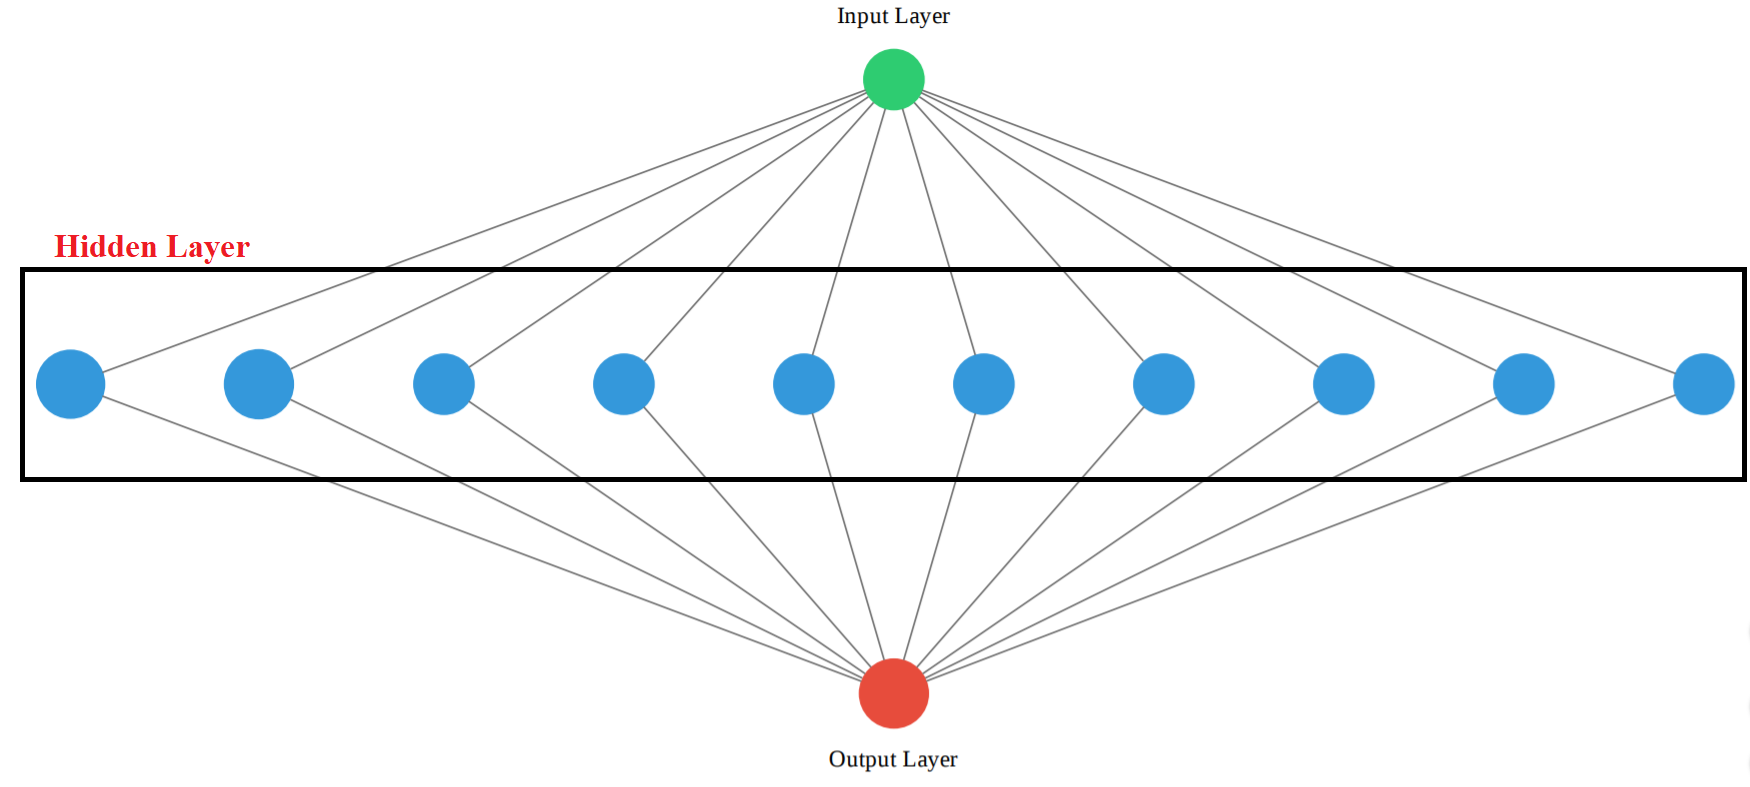

The above network is implemented using **ann_visualizer** library.
For more info about how to implement: <a href='https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e'>click here </a>

**Structure of our neural network:**

1. A single input layer with 1 neuron
2. A hidden layer with 10 neurons and **ReLU** activation function
3. A single output neuron with **linear** activation function



**Summary of our neural network:**

We have to implement neural network for **y=x*x**  function.

Our hidden layer is used to capture the essence of true parabolic relationship between y and x (output and input).


At the output a **linear** activation function is used as this is a regression task.



# Steps involved in implementation of neural network

While we will be implementing the neural network from scratch we will follow these steps:

1. Get the input data (x) and output data (y)
2. Preprocess the data (scaling, standardization etc.)
3. Initialize the weights and biases for our hidden and output layers
4. Define the loss function
5. For each epoch out of 'n' epochs:
    - Perform forward propogation
    - Calculate the loss
    - Append this loss in a list to visualize the performance later
    - Perform weight updation mechanism
        - Calculate the derivative of loss w.r.t weights
        - Update the weights using gradient descent
6. Plot the results





**Let us import the necessary libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the data

Since we have to implement the neural network for function  **y=x*x**, 
the output variable (y) will depict a parabolic relationship w.r.t input.

In [2]:
def get_data():
    x = np.arange(0, 100)
    y = np.square(x)

    x = x.reshape(len(x), 1) # reshaping (100, ) vector to (100, 1) vector 
    y = y.reshape(len(y), 1) # reshaping (100, ) vector to (100, 1) vector

    return x, y

In order to visualize the square relation between x and y let us plot it.


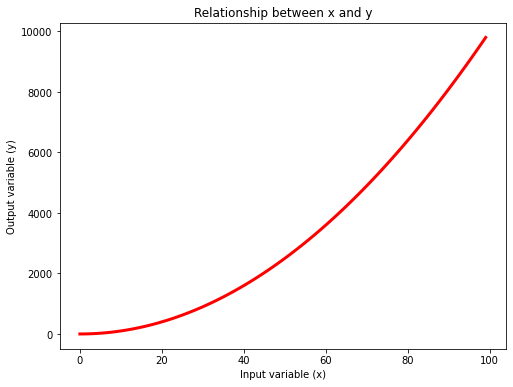

In [3]:
x, y = get_data()
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r', linewidth=3)
plt.xlabel('Input variable (x)')
plt.ylabel('Output variable (y)')
plt.title('Relationship between x and y')
plt.show()

# Step 2: Preprocess the data

Deep learning neural network models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the input may be different for each variable.

A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. Hence scaling input and output variables is a critical step in using neural network models.

In this problem we will perform **Data Normalization**.

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

A value is normalized as follows:
y = (x - min) / (max - min)

We will be manually inplementing the functionality for **MinMaxScaler**, a sklearn library used for Data Normalization.


In [4]:
def min_max_scaling(x, y):
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()

    new_x = []
    value = 0
    for i in x:
        value = (i - x_min) / (x_max - x_min)
        new_x.append(value)
    x = np.asarray(new_x).reshape(len(new_x), 1)

    new_y = []
    value = 0
    for i in y:
        value = (i - y_min) / (y_max - y_min)
        new_y.append(value)
    y = np.asarray(new_y).reshape(len(new_y), 1)
    
    return x, y

In [5]:
print('Before scaling...')
print(f'The minimum x value is {x.min()} and the maximum x value is {x.max()}')
print(f'The minimum y value is {y.min()} and the maximum y value is {y.max()}')

x, y = min_max_scaling(x, y)

print('\nAfter scaling...')
print(f'The minimum x value is {x.min()} and the maximum x value is {x.max()}')
print(f'The minimum y value is {y.min()} and the maximum y value is {y.max()}')

Before scaling...
The minimum x value is 0 and the maximum x value is 99
The minimum y value is 0 and the maximum y value is 9801

After scaling...
The minimum x value is 0.0 and the maximum x value is 1.0
The minimum y value is 0.0 and the maximum y value is 1.0


# Step 3: Initialize the weights

The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. If either occurs, loss gradients will either be too large or too small to flow backwards beneficially, and the network will take longer to converge, if it is even able to do so at all.

Instead of just initializing our weights randomly from any distribution we will initialize using **Xavier/Glorot uniform** initialization and **He uniform** initialization

**Xavier/Glorot uniform:**

Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between

<img src='https://miro.medium.com/max/875/1*H6t3yYBLlinNRUwmL-d7vw.png'>

where nᵢ is the number of incoming network connections, or “fan-in,” to the layer, and nᵢ₊₁ is the number of outgoing network connections from that layer, also known as the “fan-out.”

Xavier/Glorot weight initialization is generally used when we have linear/sigmoid activation function for our neuron layer.

In our case we will be using Xavier/Glorot weight initialization for our **output neuron layer** which has a **linear** activation function.

**He uniform:**

He uniform initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between
<img src='https://miro.medium.com/max/620/1*xxPDyUDztxWWitj48K2t2w.png'>

where fan_in is the number of incoming network connections.

**He uniform** weight initialization is generally used when we have **ReLU activation** function for our neuron layer.

In our case we will be using **He uniform** weight initialization for our **hidden neuron layer** which has a **ReLU activation** function.

In [6]:
class WeightInit:
    def __init__(self, n_inputs, n_neurons, initializer):

        if initializer == 'he_uniform':
            limit = np.sqrt(6 / n_inputs)
            self.weights = np.random.uniform(-limit, limit, (n_inputs, n_neurons))
            self.biases = np.zeros((1, n_neurons))

        elif initializer == 'glorot_uniform':
            limit = np.sqrt(6) / np.sqrt(n_inputs + n_neurons)
            self.weights = np.random.uniform(-limit, limit, (n_inputs, n_neurons))
            self.biases = np.zeros((1, n_neurons))        

We will also define our classes for ReLU and Linear activation functions:

In [7]:
class ReLUActivation:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [8]:
class LinearActivation:
    def forward(self, inputs):
        self.output = inputs

# Step 4: Defining loss function

As this is a regression task we will be using Mean Squared Error(MSE) as our loss function.

In statistics, the mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

<img src='https://www.gstatic.com/education/formulas/images_long_sheet/en/mean_squared_error.svg'>

where:

MSE	=	mean squared error

n	=	number of data points

Y_i	=	observed values

Y_i^	=	predicted values

In [9]:
def loss_calculation(y_actual, y_predicted):
    mean_square_error = np.mean(np.square(np.subtract(y_actual, y_predicted)))
    return mean_square_error

# Step 5: Implementing forward and backward propogation

## 5.1 First forward propogation

In [10]:
class Forward:
    def forward(self, inputs, weights, biases):
        self.output = np.dot(inputs, weights) + biases

This **Forward class** will take the inputs(x), weights(w) and biases(b) and will perform the dot product between input and weights and add biases to it such as    **output = (w . x) + b**

After obtaining inputs from our input layer we will compute the transformation for each unit  z = w.x + b and then apply an activation function g(z) such as ReLU element-wise. 

**Operation of first epoch:**

The operation of first epoch slighly varies w.r.t other epochs.

For first epoch in forward propogation we have to initialize weights w.r.t weight initialization techniques. These initialized weights will be used for our dot products between weights and inputs and our first forward propogation is done.

After our weights get updated through back propogation, from the second epoch these weight initialization techniques no longer come into picture.

The backpropogated weights that we obtain after our first epoch is feeded back to our second epoch.

**Structure of first forward propogation:**

1. Layer 1 (Hidden Layer)

    - Obtaining input data **x** from input layer
    - Since our hidden layer has **ReLU actuvation** at output of neuron, we will initialize weights using **He uniform**. The weights are w1 and biases are b1
    - Performing forward propogation as follows:
        - Calculating the input to activation function: z1 = w1.x + b1
        - Providing z1 to ReLU activation: a1 = ReLU(z1)


2. Layer 2 (Output Layer)

    - Input to second(output) layer will we output from hidden layer activation output **a1**.
    - Since our output layer has **Linear activation** function at output of neuron, we will initialize weights using **Xavier/Glorot uniform**. The weights are w2 and biases are b2
    - Performing forward propogation as follows:
        - Calculating the input to activation function: z2 = w2.a1 + b2
        - Providing z2 to Linear activation: a2 = Linear(z2)

In [11]:
def first_forward_propogation(x):
    layer1 = WeightInit(1, 10, 'he_uniform')
    layer1_w, layer1_b = layer1.weights, layer1.biases
    layer1_forward = Forward()
    layer1_forward.forward(x, layer1_w, layer1_b)
    activation1 = ReLUActivation()
    activation1.forward(layer1_forward.output)

    layer2 = WeightInit(10, 1, 'glorot_uniform')
    layer2_w, layer2_b = layer2.weights, layer2.biases
    layer2_forward = Forward()
    layer2_forward.forward(activation1.output, layer2_w, layer2_b)
    activation2 = LinearActivation()
    activation2.forward(layer2_forward.output)

    return activation1.output, activation2.output, layer1_w, layer1_b, layer2_w, layer2_b

At the output of this **first_forward_propogation** we will get the output from our output layer and the weights and biases from both hidden and output layers (w1, b1, w2, b2) which were used to calculate the output.

These weights and biases are obtained so that they can be used for our backpropogation and weight updation.

## 5.2 Forward propogation for remaining epochs

**Structure of remaining forward propogation epochs:**

1. Layer 1 (Hidden Layer)

    - Obtaining input data lets say **x** from the output layer of the previous epoch.
    - Use the backpropogated weights say w1 and biases b1 obtained after weight updation from the previous epoch.
    - Performing forward propogation as follows:
        - Calculating the input to activation function: z1 = w1.x + b1
        - Providing z1 to ReLU activation: **a1 = ReLU(z1)**


3. Layer 2 (Output Layer)

    - Input to output layer will we output from hidden layer activation output **a1**.
    - Use the backpropogated weights say w2 and biases b2 obtained after weight updation from the previous layer.
    - Performing forward propogation as follows:
        - Calculating the input to activation function: z2 = w2.a1 + b2
        - Providing z2 to Linear activation: **a2 = Linear(z2)**

In [12]:
def forward_propogation(x, w1, b1, w2, b2):

    layer1_forward = Forward()
    layer1_forward.forward(x, w1, b1)
    activation1 = ReLUActivation()
    activation1.forward(layer1_forward.output)

    layer2_forward = Forward()
    layer2_forward.forward(activation1.output, w2, b2)
    activation2 = LinearActivation()
    activation2.forward(layer2_forward.output)

    return activation1.output, activation2.output

This **forward_propogation** function will take input data (x) from the output of previous epoch and the updated weights and biases for both hidden and output layer.

## 5.3 Backpropogation and weight updation

### 5.3.1 Backpropogation

Backpropogation allows the information to go back from the loss function through the network in order to compute the gradient. Therefore, loop over the nodes starting at the final node in reverse topological order to compute the derivative of the final node output with respect to each edge’s node tail. Doing so will help us know who is responsible for the most error and change the parameters in that direction. 

Using backpropogation we calculate the gradients which will be further used for weights updation:

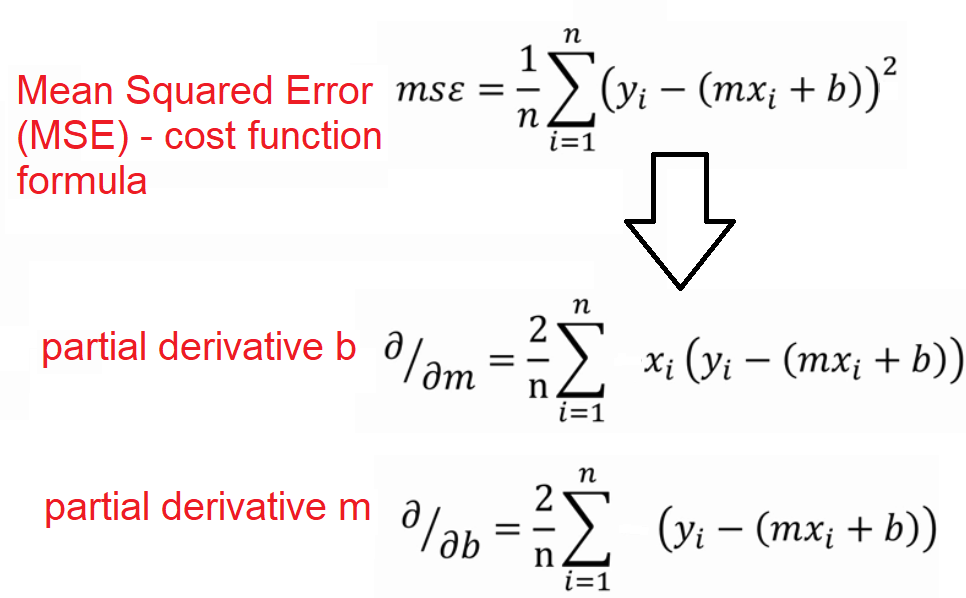

In [13]:
def gradient(w, b, x, y, y_pred):
    dw = (np.mean((y_pred - y) * x)) * 2
    db = (np.mean(y_pred - y)) * 2
    
    return dw, db

In the above code snippet:

- dw is the derivative of loss function w.r.t weights
- db is the derivative of loss function w.r.t biases

### 5.3.2 Weight updation 

Weight updation is used to rectify the errors in our weights used for calculations and to reduce our losses thereby improving the model performance. Generally weight updation is given by:

**w_new = w_old - (learning_rate * dw)**

**b_new = b_old - (learning_rate * db)**

where dw is the derivative of loss function w.r.t weights and db is the derivative of loss function w.r.t biases.

In [14]:
def update_params(w, b, dw, db, lr):
    w -= lr * dw
    b -= lr * db
    
    return w, b

In [15]:
def grad_desc(x, y, y_pred, w, b, lr):
    dw, db = gradient(w, b, x, y, y_pred)
    w, b = update_params(w, b, dw, db, lr)

    return w, b

In order to perform backpropogation and weight updation simultaneously we are combining those operations in a single function **grad_desc**

In [16]:
def plot_results(y_true, y_pred):

    plt.figure(figsize=(5, 5))
    plt.plot(x, y_true, color='r', label='actual', linewidth='5')
    plt.plot(x, y_pred, color='g', label='predicted', linewidth='5')
    plt.title('Actual vs Predicted values')
    plt.legend()
    plt.show()

# Step 6: Entire neural network operation

Now we will be following the steps mentioned in the **Steps involved in implementation** part we will be combining all the 5 steps that we have prepared till now to be used for entire computation of our neural network operation.

For epoch: 0 the mse is : 0.11486700031836851


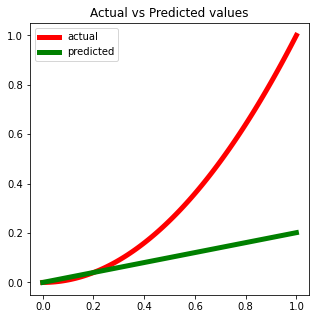


For epoch 2000 the mse is : 0.00467


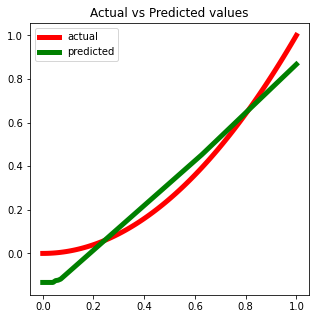


For epoch 4000 the mse is : 0.001989


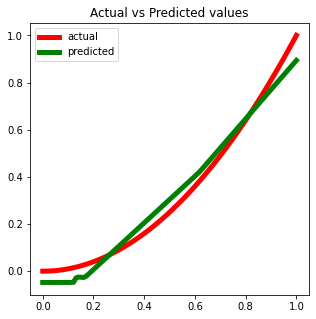


For epoch 6000 the mse is : 0.001049


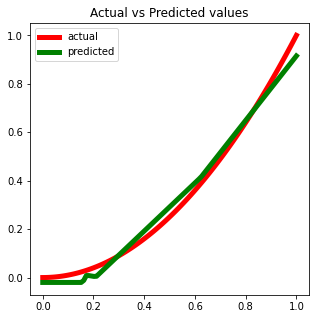


For epoch 8000 the mse is : 0.000656


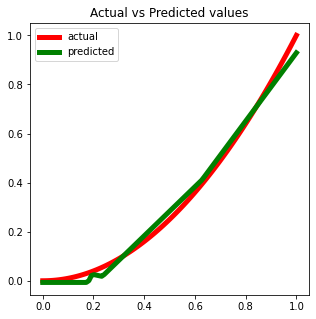


For epoch 10000 the mse is : 0.000471


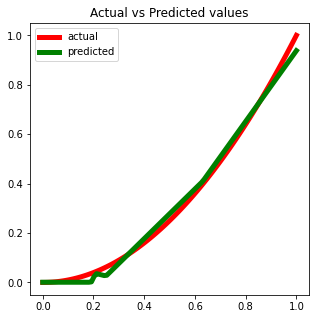

In [17]:
lr = 0.01
epochs = 10001
x, y = get_data()
x, y = min_max_scaling(x, y)
losses = []

for i in range(epochs):
    if i==0:
        output1, output2, w1, b1, w2, b2 = first_forward_propogation(x)
        loss = loss_calculation(y, output2)
        print('For epoch:', i, 'the mse is :', loss)
        plot_results(y, output2)
        losses.append(loss)

        w1, b1 = grad_desc(x, y, output1, w1, b1, lr)
        w2, b2 = grad_desc(x, y, output2, w2, b2, lr)
        continue

    output1, output2 = forward_propogation(x, w1, b1, w2, b2)
    loss = loss_calculation(y, output2)
    losses.append(loss)  

    w1, b1 = grad_desc(x, y, output1, w1, b1, lr)
    w2, b2 = grad_desc(x, y, output2, w2, b2, lr)

    if i%2000 == 0:
        print('\nFor epoch', i, 'the mse is :', round(loss, 6))
        plot_results(y, output2)

# Step 7: Visualizing the results

In this step we will observe the actual vs predicted plot our for output value and will also observe the behaviour of our loss w.r.t various epochs.

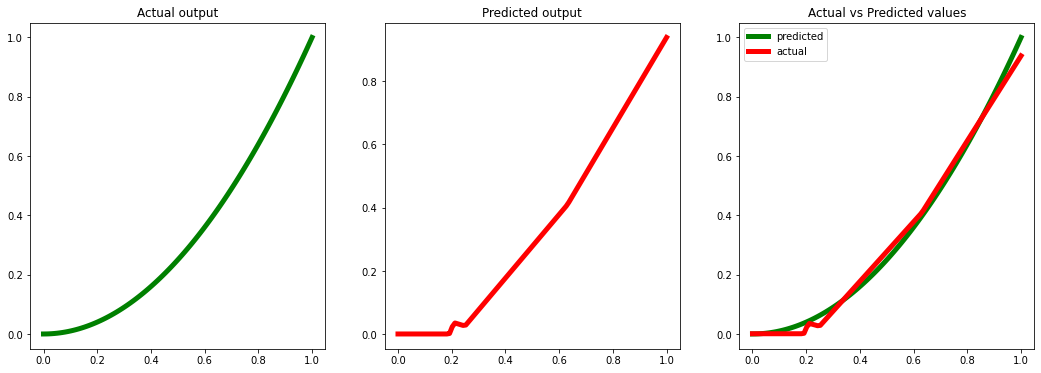

In [18]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Actual output')
plt.plot(x, y, color='g', linewidth='5')
plt.subplot(1, 3, 2)
plt.title('Predicted output')
plt.plot(x, output2, color='r', linewidth='5')
plt.subplot(1, 3, 3)
plt.plot(x, y, color='g', label='predicted', linewidth='5')
plt.plot(x, output2, color='r', label='actual', linewidth='5')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()


In [19]:
# A helper code snippet to annotate loss per 1000 epochs in loss graph

loss = []
for i in range(epochs):
    if i%1000==0:
        loss.append(losses[i])
epoch = [1000 * i for i in range(0, 11)]

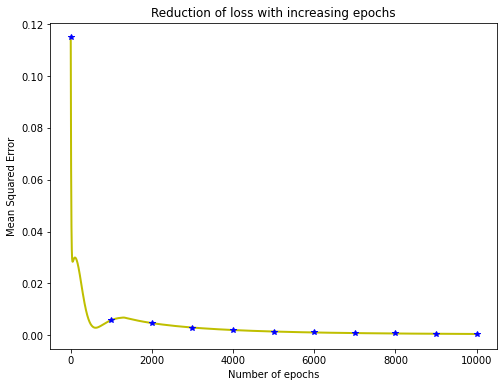

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(losses, 'y', linewidth=2)
plt.plot(epoch, loss, 'b*', linewidth=10)
plt.xlabel('Number of epochs')
plt.ylabel('Mean Squared Error')
plt.title('Reduction of loss with increasing epochs')
plt.show()

In [21]:
print(f'The final mean square error achieved is {losses[-1]}')

The final mean square error achieved is 0.00047121255682807094
